# WASHINGTON STATE HOME LOANS 2016 - Prediction Model

Purpose is to look for -

Factors affecting loan approval decisions?

Is there any area, ethinicity or gender bias?

In [1]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
import statsmodels.api as sm
from sklearn.feature_selection import RFE
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.model_selection import GridSearchCV
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

In [2]:
pathOfDataFile = 'E:/Data Science/SpringBoard DS/Capstone Project 1/Code/Dataset/washington-state-home-mortgage-hdma2016/Washington_State_HDMA-2016-cleaned.csv'

In [3]:
waHomeLoanDF = pd.read_csv(pathOfDataFile, low_memory=True)

In [4]:
pd.set_option('display.max_columns', 50)
waHomeLoanDF.head()

,tract_to_msamd_income,population,minority_population,number_of_owner_occupied_units,number_of_1_to_4_family_units,loan_amount_000s,hud_median_family_income,applicant_income_000s,state_name,purchaser_type_name,property_type_name,preapproval_name,owner_occupancy_name,msamd_name,loan_type_name,loan_purpose_name,lien_status_name,hoepa_status_name,county_name,co_applicant_sex_name,co_applicant_ethnicity_name,census_tract_number,as_of_year,application_date_indicator,applicant_sex_name,applicant_ethnicity_name,agency_name,action_taken_name
0,121.690002,8381.0,23.790001,2175.0,2660.0,227,73300.0,116.0,Washington,Freddie Mac (FHLMC),One-to-four family dwelling (other than manufa...,Not applicable,Owner-occupied as a principal dwelling,"Portland, Vancouver, Hillsboro - OR, WA",Conventional,Refinancing,Secured by a first lien,Not a HOEPA loan,Clark County,Male,Not Hispanic or Latino,413.27,2016,0,Female,Not Hispanic or Latino,Consumer Financial Protection Bureau,Loan originated
1,83.370003,4915.0,23.990000,1268.0,1777.0,240,57900.0,42.0,Washington,"Life insurance company, credit union, mortgage...",One-to-four family dwelling (other than manufa...,Not applicable,Owner-occupied as a principal dwelling,Walla Walla - WA,FHA-insured,Home purchase,Secured by a first lien,Not a HOEPA loan,Walla Walla County,No co-applicant,No co-applicant,9208.01,2016,0,Male,Hispanic or Latino,Department of Housing and Urban Development,Loan originated
2,91.129997,5075.0,11.820000,1136.0,1838.0,241,73300.0,117.0,Washington,Loan was not originated or was not sold in cal...,One-to-four family dwelling (other than manufa...,Not applicable,Owner-occupied as a principal dwelling,"Portland, Vancouver, Hillsboro - OR, WA",Conventional,Refinancing,Secured by a first lien,Not a HOEPA loan,Clark County,Female,Not Hispanic or Latino,414.00,2016,0,Male,Not Hispanic or Latino,Department of Housing and Urban Development,Loan originated
3,146.169998,5032.0,8.590000,1525.0,1820.0,351,73300.0,216.5,Washington,Loan was not originated or was not sold in cal...,One-to-four family dwelling (other than manufa...,Not applicable,Owner-occupied as a principal dwelling,"Portland, Vancouver, Hillsboro - OR, WA",Conventional,Refinancing,Secured by a first lien,Not a HOEPA loan,Clark County,Female,"Information not provided by applicant in mail,...",405.10,2016,0,Male,"Information not provided by applicant in mail,...",National Credit Union Administration,Loan originated
4,162.470001,5183.0,10.500000,1705.0,2104.0,417,78100.0,114.0,Washington,Freddie Mac (FHLMC),One-to-four family dwelling (other than manufa...,Not applicable,Owner-occupied as a principal dwelling,"Bremerton, Silverdale - WA",Conventional,Home improvement,Secured by a first lien,Not a HOEPA loan,Kitsap County,Male,Not Hispanic or Latino,907.00,2016,0,Female,Not Hispanic or Latino,Federal Deposit Insurance Corporation,Loan originated


In [5]:
waHomeLoanDF.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 465951 entries, 0 to 465950
Data columns (total 28 columns):
tract_to_msamd_income             465951 non-null float64
population                        465951 non-null float64
minority_population               465951 non-null float64
number_of_owner_occupied_units    465951 non-null float64
number_of_1_to_4_family_units     465951 non-null float64
loan_amount_000s                  465951 non-null int64
hud_median_family_income          465951 non-null float64
applicant_income_000s             465951 non-null float64
state_name                        465951 non-null object
purchaser_type_name               465951 non-null object
property_type_name                465951 non-null object
preapproval_name                  465951 non-null object
owner_occupancy_name              465951 non-null object
msamd_name                        465951 non-null object
loan_type_name                    465951 non-null object
loan_purpose_name           

In [6]:
waHomeLoanDF.agency_name.value_counts()

Department of Housing and Urban Development    238231
Consumer Financial Protection Bureau           142499
Federal Deposit Insurance Corporation           45978
National Credit Union Administration            30418
Office of the Comptroller of the Currency        5581
Federal Reserve System                           3244
Name: agency_name, dtype: int64

### Inspect action_taken_name

In [7]:
waHomeLoanDF.action_taken_name.value_counts()

Loan originated                                        263650
Application denied by financial institution             64006
Application withdrawn by applicant                      60121
Loan purchased by the institution                       48336
File closed for incompleteness                          18119
Application approved but not accepted                   11706
Preapproval request approved but not accepted              10
Preapproval request denied by financial institution         3
Name: action_taken_name, dtype: int64

'Preapproval request approved but not accepted' and 'Preapproval request denied by financial institution' have very few entries and will be removed.

In [8]:
waHomeLoanDF = waHomeLoanDF[~waHomeLoanDF.action_taken_name.isin(['Application withdrawn by applicant', 
                                                                'Preapproval request approved but not accepted', 
                                                                'Preapproval request denied by financial institution'])]

In [9]:
waHomeLoanDF.action_taken_name.value_counts()

Loan originated                                263650
Application denied by financial institution     64006
Loan purchased by the institution               48336
File closed for incompleteness                  18119
Application approved but not accepted           11706
Name: action_taken_name, dtype: int64

### Add new column for loan approval with binary values

In [10]:
# function to set 'Loan originated' and 'Loan purchased by the institution' to one and loan denial to 0
def actionTakenBinaryConv(x):
    if x == 'Loan originated':
        return 1
    elif x == 'Loan purchased by the institution':
        return 1
    else:
        return 0

In [11]:
#add new column for loan approval
waHomeLoanDF['loan_approval'] = waHomeLoanDF.action_taken_name.apply(actionTakenBinaryConv)

In [12]:
#inspect loan approval
waHomeLoanDF.loan_approval.value_counts()

1    311986
0     93831
Name: loan_approval, dtype: int64

### Convert features to binary values
1. property_type_name
2. owner_occupancy_name
3. loan_purpose_name
4. preapproval_name

Add a list to include all the colums and then another list to include cloumns to be deleted. Then inspect the columns that hava object and convert them to binary. Print all converted binary values.

In [13]:
# function to convert columns to binary values
def applyBinary(feature):
    featureValList = feature.value_counts().index
    for i in range(len(featureValList)):
        feature.replace(featureValList[i], i, inplace=True)

In [14]:
#inspect owner occupany
waHomeLoanDF.owner_occupancy_name.value_counts()

Owner-occupied as a principal dwelling        370247
Not owner-occupied as a principal dwelling     33941
Not applicable                                  1629
Name: owner_occupancy_name, dtype: int64

Remove Not applicable values

In [15]:
waHomeLoanDF = waHomeLoanDF[waHomeLoanDF.owner_occupancy_name != 'Not applicable']

In [16]:
applyBinary(waHomeLoanDF.owner_occupancy_name)

In [17]:
#inspect owner occupany
waHomeLoanDF.owner_occupancy_name.value_counts()

0    370247
1     33941
Name: owner_occupancy_name, dtype: int64

In [18]:
#inspect property_type_name
waHomeLoanDF.property_type_name.value_counts()

One-to-four family dwelling (other than manufactured housing)    391395
Manufactured housing                                              12593
Multifamily dwelling                                                200
Name: property_type_name, dtype: int64

In [19]:
applyBinary(waHomeLoanDF.property_type_name)

In [20]:
#inspect property_type_name
waHomeLoanDF.property_type_name.value_counts()

0    391395
1     12593
2       200
Name: property_type_name, dtype: int64

In [21]:
#inspect loan_purpose_name
waHomeLoanDF.loan_purpose_name.value_counts()

Refinancing         212683
Home purchase       170310
Home improvement     21195
Name: loan_purpose_name, dtype: int64

In [22]:
applyBinary(waHomeLoanDF.loan_purpose_name)

In [23]:
#inspect loan_purpose_name
waHomeLoanDF.loan_purpose_name.value_counts()

0    212683
1    170310
2     21195
Name: loan_purpose_name, dtype: int64

In [24]:
#inspect preapproval_name
waHomeLoanDF.preapproval_name.value_counts()

Not applicable                   344494
Preapproval was not requested     49476
Preapproval was requested         10218
Name: preapproval_name, dtype: int64

In [25]:
applyBinary(waHomeLoanDF.preapproval_name)

In [26]:
#inspect preapproval_name
waHomeLoanDF.preapproval_name.value_counts()

0    344494
1     49476
2     10218
Name: preapproval_name, dtype: int64

In [27]:
applyBinary(waHomeLoanDF.purchaser_type_name)
applyBinary(waHomeLoanDF.msamd_name)
applyBinary(waHomeLoanDF.loan_type_name)
applyBinary(waHomeLoanDF.lien_status_name)
applyBinary(waHomeLoanDF.hoepa_status_name)
applyBinary(waHomeLoanDF.county_name)
applyBinary(waHomeLoanDF.applicant_sex_name)
applyBinary(waHomeLoanDF.applicant_ethnicity_name)
applyBinary(waHomeLoanDF.agency_name)

In [28]:
applyBinary(waHomeLoanDF.co_applicant_sex_name)
applyBinary(waHomeLoanDF.co_applicant_ethnicity_name)

In [29]:
waHomeLoanDF.purchaser_type_name.value_counts()

0    158280
1     75840
2     60791
3     51708
4     21485
5     18253
6     11918
7      3984
8      1911
9        18
Name: purchaser_type_name, dtype: int64

In [30]:
waHomeLoanDF.msamd_name.value_counts()

0     172417
1      52760
2      37986
3      34841
4      15645
5      15612
6      14707
7      12118
8      11132
9       9997
10      9872
11      6868
12      6654
13      2668
14       911
Name: msamd_name, dtype: int64

In [31]:
waHomeLoanDF.loan_type_name.value_counts()

0    287406
1     58146
2     54639
3      3997
Name: loan_type_name, dtype: int64

In [32]:
waHomeLoanDF.lien_status_name.value_counts()

0    343013
1     48163
2      7876
3      5136
Name: lien_status_name, dtype: int64

In [33]:
waHomeLoanDF.hoepa_status_name.value_counts()

0    404175
1        13
Name: hoepa_status_name, dtype: int64

In [34]:
waHomeLoanDF.county_name.value_counts()

0     119845
1      52760
2      51134
3      33203
4      25585
5      15531
6      15241
7      11078
8       9975
9       8549
10      6850
11      6100
12      5881
13      3929
14      3666
15      3328
16      3282
17      3107
18      3102
19      2895
20      2550
21      2442
22      1860
23      1812
24      1578
25      1252
26      1169
27      1002
28       911
29       818
30       802
31       693
32       624
33       539
34       463
35       226
36       209
37       118
38        79
Name: county_name, dtype: int64

In [35]:
waHomeLoanDF.applicant_sex_name.value_counts()

0    244321
1     94739
2     33088
3     32040
Name: applicant_sex_name, dtype: int64

In [36]:
waHomeLoanDF.applicant_ethnicity_name.value_counts()

0    301997
1     50827
2     32089
3     19275
Name: applicant_ethnicity_name, dtype: int64

In [37]:
waHomeLoanDF.agency_name.value_counts()

0    202882
1    127555
2     39239
3     26753
4      4763
5      2996
Name: agency_name, dtype: int64

In [38]:
waHomeLoanDF.co_applicant_sex_name.value_counts()

0    179679
1    141918
2     34628
3     28343
4     19620
Name: co_applicant_sex_name, dtype: int64

In [39]:
waHomeLoanDF.co_applicant_ethnicity_name.value_counts()

0    179679
1    156350
2     30324
3     28375
4      9460
Name: co_applicant_ethnicity_name, dtype: int64

## Model Prediction

Following are the features considered for generalized linear model
tract_to_msamd_income
loan_amount_000s
applicant_income_000s
property_type_name
owner_occupancy_name
loan_purpose_name
population
number_of_owner_occupied_units
number_of_1_to_4_family_units
census_tract_number
preapproval_name

In [40]:
features = list(waHomeLoanDF.columns.values)
features.remove('state_name')
features.remove('as_of_year')
features.remove('loan_approval')
features.remove('action_taken_name')
print(features)

['tract_to_msamd_income', 'population', 'minority_population', 'number_of_owner_occupied_units', 'number_of_1_to_4_family_units', 'loan_amount_000s', 'hud_median_family_income', 'applicant_income_000s', 'purchaser_type_name', 'property_type_name', 'preapproval_name', 'owner_occupancy_name', 'msamd_name', 'loan_type_name', 'loan_purpose_name', 'lien_status_name', 'hoepa_status_name', 'county_name', 'co_applicant_sex_name', 'co_applicant_ethnicity_name', 'census_tract_number', 'application_date_indicator', 'applicant_sex_name', 'applicant_ethnicity_name', 'agency_name']


Number of features 25
Selected features [ True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True]
Feature rank [1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1]
Best parameter is 10 with score is 0.87649296428
Test data accuracy score with GridSearchCV: 0.891140305302
              precision    recall  f1-score   support

           0       0.78      0.73      0.76     18723
           1       0.92      0.94      0.93     62115

   micro avg       0.89      0.89      0.89     80838
   macro avg       0.85      0.84      0.84     80838
weighted avg       0.89      0.89      0.89     80838

()
Confusion matrix
[[13729  4994]
 [ 3806 58309]]
()
print Area Under curve score
0.9547506395740226


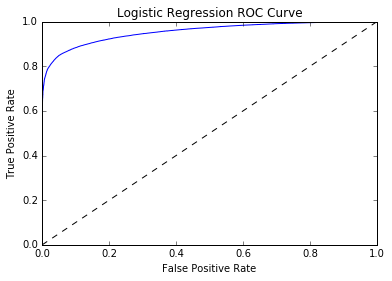

Number of features 24
Selected features [ True  True  True  True  True  True False  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True]
Feature rank [1 1 1 1 1 1 2 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1]
Best parameter is 1 with score is 0.897164063708
Test data accuracy score with GridSearchCV: 0.895321507212
              precision    recall  f1-score   support

           0       0.75      0.83      0.79     18723
           1       0.95      0.91      0.93     62115

   micro avg       0.90      0.90      0.90     80838
   macro avg       0.85      0.87      0.86     80838
weighted avg       0.90      0.90      0.90     80838

()
Confusion matrix
[[15541  3182]
 [ 5280 56835]]
()
print Area Under curve score
0.9591784919754515


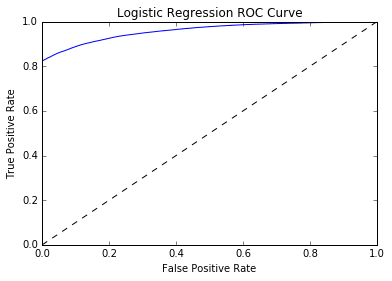

Number of features 23
Selected features [ True  True  True  True  True  True False  True  True  True  True  True
  True  True  True  True  True  True  True  True False  True  True  True
  True]
Feature rank [1 1 1 1 1 1 3 1 1 1 1 1 1 1 1 1 1 1 1 1 2 1 1 1 1]
Best parameter is 10 with score is 0.897151693212
Test data accuracy score with GridSearchCV: 0.896076102823
              precision    recall  f1-score   support

           0       0.75      0.82      0.79     18723
           1       0.94      0.92      0.93     62115

   micro avg       0.90      0.90      0.90     80838
   macro avg       0.85      0.87      0.86     80838
weighted avg       0.90      0.90      0.90     80838

()
Confusion matrix
[[15349  3374]
 [ 5027 57088]]
()
print Area Under curve score
0.9585288990715306


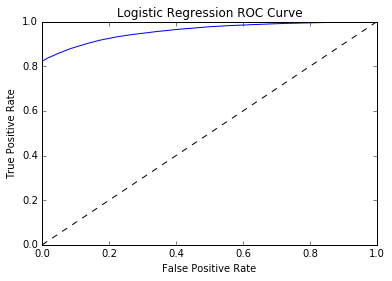

Number of features 22
Selected features [ True False  True  True  True  True False  True  True  True  True  True
  True  True  True  True  True  True  True  True False  True  True  True
  True]
Feature rank [1 2 1 1 1 1 4 1 1 1 1 1 1 1 1 1 1 1 1 1 3 1 1 1 1]
Best parameter is 100 with score is 0.897538271223
Test data accuracy score with GridSearchCV: 0.896471956258
              precision    recall  f1-score   support

           0       0.75      0.83      0.79     18723
           1       0.95      0.92      0.93     62115

   micro avg       0.90      0.90      0.90     80838
   macro avg       0.85      0.87      0.86     80838
weighted avg       0.90      0.90      0.90     80838

()
Confusion matrix
[[15605  3118]
 [ 5251 56864]]
()
print Area Under curve score
0.9593938827682074


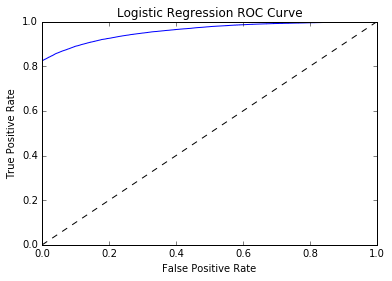

Number of features 21
Selected features [ True False  True False  True  True False  True  True  True  True  True
  True  True  True  True  True  True  True  True False  True  True  True
  True]
Feature rank [1 3 1 2 1 1 5 1 1 1 1 1 1 1 1 1 1 1 1 1 4 1 1 1 1]
Best parameter is 10 with score is 0.897590845833
Test data accuracy score with GridSearchCV: 0.896496697098
              precision    recall  f1-score   support

           0       0.75      0.83      0.79     18723
           1       0.95      0.92      0.93     62115

   micro avg       0.90      0.90      0.90     80838
   macro avg       0.85      0.87      0.86     80838
weighted avg       0.90      0.90      0.90     80838

()
Confusion matrix
[[15630  3093]
 [ 5274 56841]]
()
print Area Under curve score
0.959564714722378


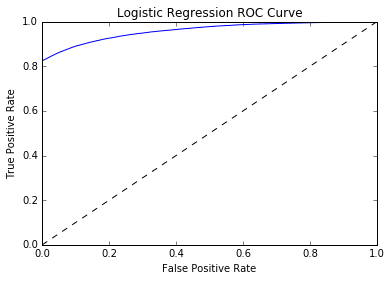

Number of features 20
Selected features [ True False  True False False  True False  True  True  True  True  True
  True  True  True  True  True  True  True  True False  True  True  True
  True]
Feature rank [1 4 1 3 2 1 6 1 1 1 1 1 1 1 1 1 1 1 1 1 5 1 1 1 1]
Best parameter is 0.1 with score is 0.897436214628
Test data accuracy score with GridSearchCV: 0.895717360647
              precision    recall  f1-score   support

           0       0.75      0.83      0.79     18723
           1       0.95      0.91      0.93     62115

   micro avg       0.90      0.90      0.90     80838
   macro avg       0.85      0.87      0.86     80838
weighted avg       0.90      0.90      0.90     80838

()
Confusion matrix
[[15625  3098]
 [ 5332 56783]]
()
print Area Under curve score
0.9595634550265302


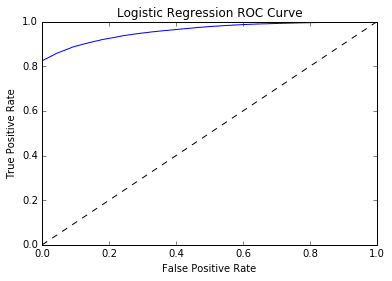

Number of features 19
Selected features [ True False  True False False False False  True  True  True  True  True
  True  True  True  True  True  True  True  True False  True  True  True
  True]
Feature rank [1 5 1 4 3 2 7 1 1 1 1 1 1 1 1 1 1 1 1 1 6 1 1 1 1]
Best parameter is 0.001 with score is 0.895982681305
Test data accuracy score with GridSearchCV: 0.895383359311
              precision    recall  f1-score   support

           0       0.76      0.80      0.78     18723
           1       0.94      0.92      0.93     62115

   micro avg       0.90      0.90      0.90     80838
   macro avg       0.85      0.86      0.86     80838
weighted avg       0.90      0.90      0.90     80838

()
Confusion matrix
[[15046  3677]
 [ 4780 57335]]
()
print Area Under curve score
0.9581460486980615


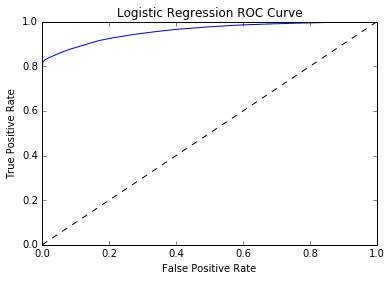

Number of features 18
Selected features [ True False False False False False False  True  True  True  True  True
  True  True  True  True  True  True  True  True False  True  True  True
  True]
Feature rank [1 6 2 5 4 3 8 1 1 1 1 1 1 1 1 1 1 1 1 1 7 1 1 1 1]
Best parameter is 100 with score is 0.895447657337
Test data accuracy score with GridSearchCV: 0.8946906158
              precision    recall  f1-score   support

           0       0.74      0.83      0.79     18723
           1       0.95      0.91      0.93     62115

   micro avg       0.89      0.89      0.89     80838
   macro avg       0.85      0.87      0.86     80838
weighted avg       0.90      0.89      0.90     80838

()
Confusion matrix
[[15597  3126]
 [ 5387 56728]]
()
print Area Under curve score
0.9593461974763099


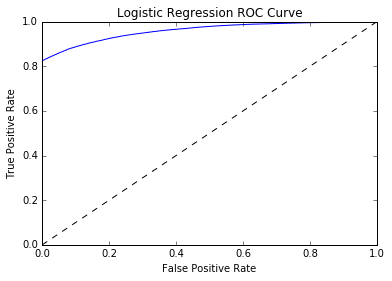

Number of features 17
Selected features [ True False False False False False False  True  True  True  True  True
 False  True  True  True  True  True  True  True False  True  True  True
  True]
Feature rank [1 7 3 6 5 4 9 1 1 1 1 1 2 1 1 1 1 1 1 1 8 1 1 1 1]
Best parameter is 0.1 with score is 0.895633214783
Test data accuracy score with GridSearchCV: 0.894208169425
              precision    recall  f1-score   support

           0       0.74      0.83      0.78     18723
           1       0.95      0.91      0.93     62115

   micro avg       0.89      0.89      0.89     80838
   macro avg       0.84      0.87      0.86     80838
weighted avg       0.90      0.89      0.90     80838

()
Confusion matrix
[[15581  3142]
 [ 5410 56705]]
()
print Area Under curve score
0.9593228299033686


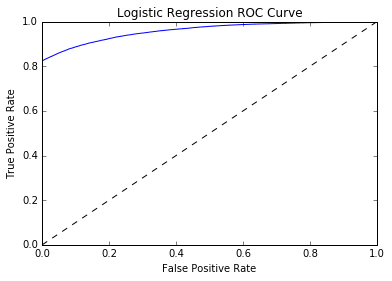

Number of features 16
Selected features [False False False False False False False  True  True  True  True  True
 False  True  True  True  True  True  True  True False  True  True  True
  True]
Feature rank [ 2  8  4  7  6  5 10  1  1  1  1  1  3  1  1  1  1  1  1  1  9  1  1  1
  1]
Best parameter is 0.001 with score is 0.896248646977
Test data accuracy score with GridSearchCV: 0.895284395952
              precision    recall  f1-score   support

           0       0.76      0.80      0.78     18723
           1       0.94      0.92      0.93     62115

   micro avg       0.90      0.90      0.90     80838
   macro avg       0.85      0.86      0.86     80838
weighted avg       0.90      0.90      0.90     80838

()
Confusion matrix
[[15047  3676]
 [ 4789 57326]]
()
print Area Under curve score
0.9587391964797444


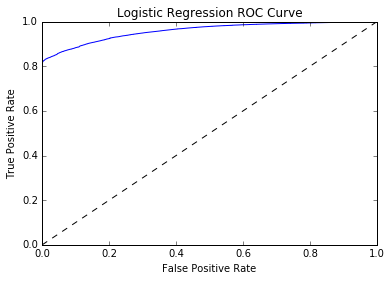

Number of features 15
Selected features [False False False False False False False False  True  True  True  True
 False  True  True  True  True  True  True  True False  True  True  True
  True]
Feature rank [ 3  9  5  8  7  6 11  2  1  1  1  1  4  1  1  1  1  1  1  1 10  1  1  1
  1]
Best parameter is 0.001 with score is 0.887586206897
Test data accuracy score with GridSearchCV: 0.883891239269
              precision    recall  f1-score   support

           0       0.72      0.81      0.76     18723
           1       0.94      0.91      0.92     62115

   micro avg       0.88      0.88      0.88     80838
   macro avg       0.83      0.86      0.84     80838
weighted avg       0.89      0.88      0.89     80838

()
Confusion matrix
[[15135  3588]
 [ 5798 56317]]
()
print Area Under curve score
0.9553580541635596


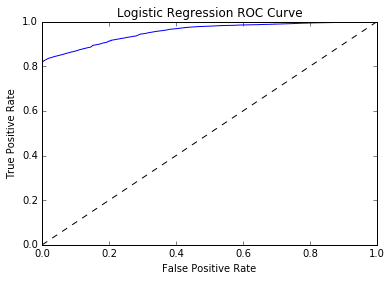

Number of features 14
Selected features [False False False False False False False False  True  True  True  True
 False  True  True  True  True  True  True  True False  True False  True
  True]
Feature rank [ 4 10  6  9  8  7 12  3  1  1  1  1  5  1  1  1  1  1  1  1 11  1  2  1
  1]
Best parameter is 0.001 with score is 0.885715169321
Test data accuracy score with GridSearchCV: 0.886093174002
              precision    recall  f1-score   support

           0       0.73      0.81      0.77     18723
           1       0.94      0.91      0.92     62115

   micro avg       0.89      0.89      0.89     80838
   macro avg       0.83      0.86      0.85     80838
weighted avg       0.89      0.89      0.89     80838

()
Confusion matrix
[[15135  3588]
 [ 5620 56495]]
()
print Area Under curve score
0.9554077764653295


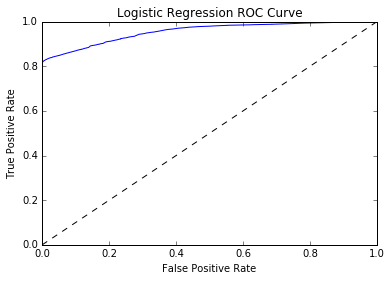

Number of features 13
Selected features [False False False False False False False False  True  True  True  True
 False  True  True  True  True False  True  True False  True False  True
  True]
Feature rank [ 5 11  7 10  9  8 13  4  1  1  1  1  6  1  1  1  1  2  1  1 12  1  3  1
  1]
Best parameter is 0.001 with score is 0.883680222669
Test data accuracy score with GridSearchCV: 0.883829387169
              precision    recall  f1-score   support

           0       0.72      0.80      0.76     18723
           1       0.94      0.91      0.92     62115

   micro avg       0.88      0.88      0.88     80838
   macro avg       0.83      0.86      0.84     80838
weighted avg       0.89      0.88      0.89     80838

()
Confusion matrix
[[15063  3660]
 [ 5731 56384]]
()
print Area Under curve score
0.9550328944204756


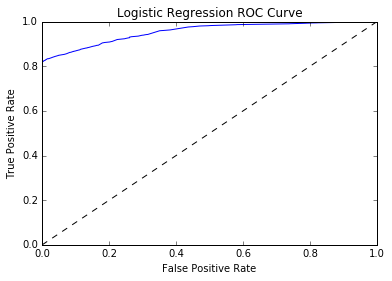

Number of features 12
Selected features [False False False False False False False False  True  True  True  True
 False  True  True  True  True False False  True False  True False  True
  True]
Feature rank [ 6 12  8 11 10  9 14  5  1  1  1  1  7  1  1  1  1  3  2  1 13  1  4  1
  1]
Best parameter is 0.001 with score is 0.883856502242
Test data accuracy score with GridSearchCV: 0.883965461788
              precision    recall  f1-score   support

           0       0.73      0.80      0.76     18723
           1       0.94      0.91      0.92     62115

   micro avg       0.88      0.88      0.88     80838
   macro avg       0.83      0.86      0.84     80838
weighted avg       0.89      0.88      0.89     80838

()
Confusion matrix
[[15035  3688]
 [ 5692 56423]]
()
print Area Under curve score
0.9550091403401735


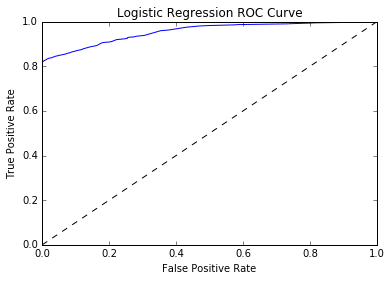

Number of features 11
Selected features [False False False False False False False False  True  True  True False
 False  True  True  True  True False False  True False  True False  True
  True]
Feature rank [ 7 13  9 12 11 10 15  6  1  1  1  2  8  1  1  1  1  4  3  1 14  1  5  1
  1]
Best parameter is 1 with score is 0.88532859131
Test data accuracy score with GridSearchCV: 0.886018951483
              precision    recall  f1-score   support

           0       0.72      0.84      0.77     18723
           1       0.95      0.90      0.92     62115

   micro avg       0.89      0.89      0.89     80838
   macro avg       0.83      0.87      0.85     80838
weighted avg       0.89      0.89      0.89     80838

()
Confusion matrix
[[15685  3038]
 [ 6176 55939]]
()
print Area Under curve score
0.9553186261134545


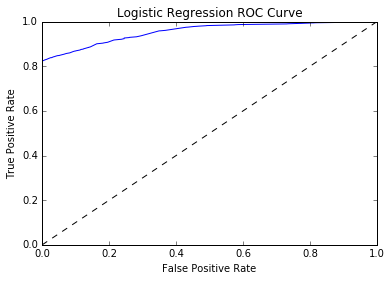

Number of features 10
Selected features [False False False False False False False False  True  True  True False
 False  True  True  True  True False False  True False  True False False
  True]
Feature rank [ 8 14 10 13 12 11 16  7  1  1  1  3  9  1  1  1  1  5  4  1 15  1  6  2
  1]
Best parameter is 0.001 with score is 0.883216329055
Test data accuracy score with GridSearchCV: 0.883161384497
              precision    recall  f1-score   support

           0       0.73      0.80      0.76     18723
           1       0.94      0.91      0.92     62115

   micro avg       0.88      0.88      0.88     80838
   macro avg       0.83      0.85      0.84     80838
weighted avg       0.89      0.88      0.88     80838

()
Confusion matrix
[[14910  3813]
 [ 5632 56483]]
()
print Area Under curve score
0.9549412203776019


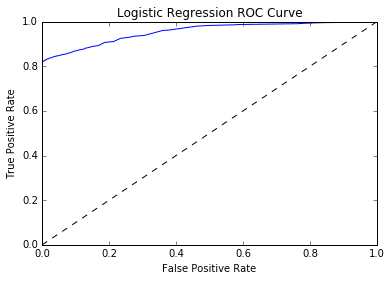

Number of features 9
Selected features [False False False False False False False False  True  True  True False
 False  True  True  True  True False False False False  True False False
  True]
Feature rank [ 9 15 11 14 13 12 17  8  1  1  1  4 10  1  1  1  1  6  5  2 16  1  7  3
  1]
Best parameter is 0.001 with score is 0.891170558219
Test data accuracy score with GridSearchCV: 0.877879215221
              precision    recall  f1-score   support

           0       0.70      0.84      0.76     18723
           1       0.95      0.89      0.92     62115

   micro avg       0.88      0.88      0.88     80838
   macro avg       0.82      0.86      0.84     80838
weighted avg       0.89      0.88      0.88     80838

()
Confusion matrix
[[15697  3026]
 [ 6846 55269]]
()
print Area Under curve score
0.954215147598369


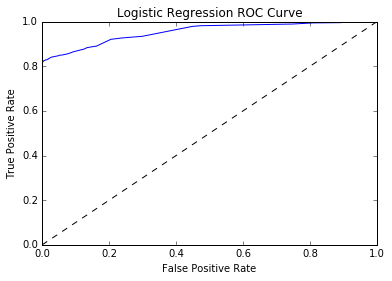

Number of features 8
Selected features [False False False False False False False False  True  True  True False
 False  True  True False  True False False False False  True False False
  True]
Feature rank [10 16 12 15 14 13 18  9  1  1  1  5 11  1  1  2  1  7  6  3 17  1  8  4
  1]
Best parameter is 0.1 with score is 0.878101128808
Test data accuracy score with GridSearchCV: 0.87878225587
              precision    recall  f1-score   support

           0       0.70      0.85      0.76     18723
           1       0.95      0.89      0.92     62115

   micro avg       0.88      0.88      0.88     80838
   macro avg       0.82      0.87      0.84     80838
weighted avg       0.89      0.88      0.88     80838

()
Confusion matrix
[[15855  2868]
 [ 6931 55184]]
()
print Area Under curve score
0.9546237968007586


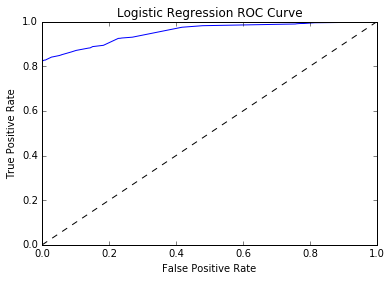

Number of features 7
Selected features [False False False False False False False False  True  True  True False
 False  True  True False False False False False False  True False False
  True]
Feature rank [11 17 13 16 15 14 19 10  1  1  1  6 12  1  1  3  2  8  7  4 18  1  9  5
  1]
Best parameter is 0.1 with score is 0.878101128808
Test data accuracy score with GridSearchCV: 0.87878225587
              precision    recall  f1-score   support

           0       0.70      0.85      0.76     18723
           1       0.95      0.89      0.92     62115

   micro avg       0.88      0.88      0.88     80838
   macro avg       0.82      0.87      0.84     80838
weighted avg       0.89      0.88      0.88     80838

()
Confusion matrix
[[15855  2868]
 [ 6931 55184]]
()
print Area Under curve score
0.9546235521704046


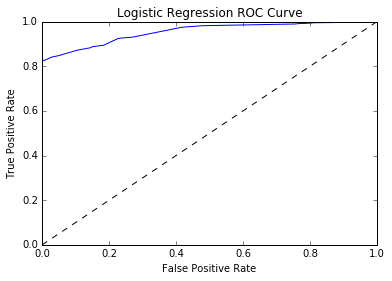

Number of features 6
Selected features [False False False False False False False False  True  True False False
 False  True  True False False False False False False  True False False
  True]
Feature rank [12 18 14 17 16 15 20 11  1  1  2  7 13  1  1  4  3  9  8  5 19  1 10  6
  1]
Best parameter is 0.001 with score is 0.891210762332
Test data accuracy score with GridSearchCV: 0.89128875034
              precision    recall  f1-score   support

           0       0.75      0.79      0.77     18723
           1       0.94      0.92      0.93     62115

   micro avg       0.89      0.89      0.89     80838
   macro avg       0.84      0.86      0.85     80838
weighted avg       0.89      0.89      0.89     80838

()
Confusion matrix
[[14852  3871]
 [ 4917 57198]]
()
print Area Under curve score
0.9536697715245789


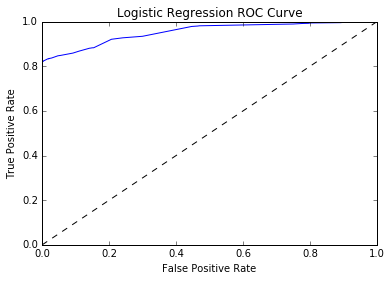

Number of features 5
Selected features [False False False False False False False False  True  True False False
 False  True  True False False False False False False  True False False
 False]
Feature rank [13 19 15 18 17 16 21 12  1  1  3  8 14  1  1  5  4 10  9  6 20  1 11  7
  2]
Best parameter is 0.001 with score is 0.883692593165
Test data accuracy score with GridSearchCV: 0.88209752839
              precision    recall  f1-score   support

           0       0.73      0.78      0.75     18723
           1       0.93      0.91      0.92     62115

   micro avg       0.88      0.88      0.88     80838
   macro avg       0.83      0.85      0.84     80838
weighted avg       0.89      0.88      0.88     80838

()
Confusion matrix
[[14679  4044]
 [ 5487 56628]]
()
print Area Under curve score
0.9433214320451121


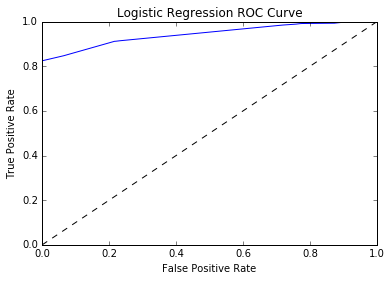

Number of features 4
Selected features [False False False False False False False False  True False False False
 False  True  True False False False False False False  True False False
 False]
Feature rank [14 20 16 19 18 17 22 13  1  2  4  9 15  1  1  6  5 11 10  7 21  1 12  8
  3]
Best parameter is 0.001 with score is 0.88197309417
Test data accuracy score with GridSearchCV: 0.880835745565
              precision    recall  f1-score   support

           0       0.73      0.77      0.75     18723
           1       0.93      0.91      0.92     62115

   micro avg       0.88      0.88      0.88     80838
   macro avg       0.83      0.84      0.84     80838
weighted avg       0.88      0.88      0.88     80838

()
Confusion matrix
[[14429  4294]
 [ 5339 56776]]
()
print Area Under curve score
0.9432750296652999


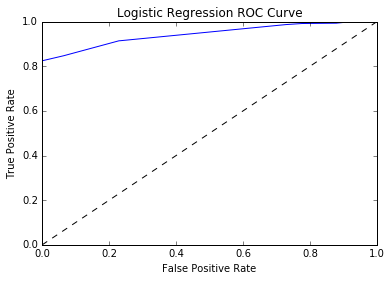

Number of features 3
Selected features [False False False False False False False False  True False False False
 False  True False False False False False False False  True False False
 False]
Feature rank [15 21 17 20 19 18 23 14  1  3  5 10 16  1  2  7  6 12 11  8 22  1 13  9
  4]
Best parameter is 0.001 with score is 0.86473171486
Test data accuracy score with GridSearchCV: 0.865162423613
              precision    recall  f1-score   support

           0       0.63      1.00      0.77     18723
           1       1.00      0.82      0.90     62115

   micro avg       0.87      0.87      0.87     80838
   macro avg       0.82      0.91      0.84     80838
weighted avg       0.91      0.87      0.87     80838

()
Confusion matrix
[[18723     0]
 [10900 51215]]
()
print Area Under curve score
0.9294715400936961


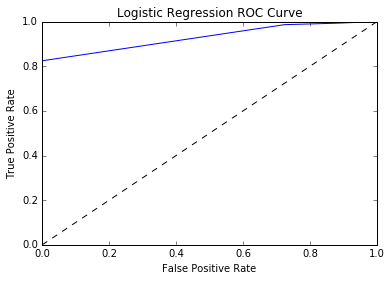

Number of features 2
Selected features [False False False False False False False False  True False False False
 False False False False False False False False False  True False False
 False]
Feature rank [16 22 18 21 20 19 24 15  1  4  6 11 17  2  3  8  7 13 12  9 23  1 14 10
  5]
Best parameter is 0.001 with score is 0.86473171486
Test data accuracy score with GridSearchCV: 0.865162423613
              precision    recall  f1-score   support

           0       0.63      1.00      0.77     18723
           1       1.00      0.82      0.90     62115

   micro avg       0.87      0.87      0.87     80838
   macro avg       0.82      0.91      0.84     80838
weighted avg       0.91      0.87      0.87     80838

()
Confusion matrix
[[18723     0]
 [10900 51215]]
()
print Area Under curve score
0.9122595186347904


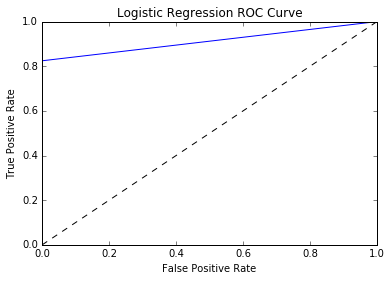

In [77]:
numberOfFeatures = len(features)
j=0;
logReg10 = LogisticRegression()
Cs = [0.001, 0.1, 1, 10, 100]
parameters = {"C": Cs}
for i in range(numberOfFeatures, 1, -1):
    rfe = RFE(logReg10, numberOfFeatures-j)
    xtrain, xtest, ytrain, ytest = train_test_split(waHomeLoanDF[features].values, 
                                              waHomeLoanDF['loan_approval'].values, test_size=.20, random_state=42)
    fit = rfe.fit(xtrain, ytrain)
    print("Number of features {}".format(fit.n_features_))
    print("Selected features {}".format(fit.support_))
    print("Feature rank {}".format(fit.ranking_))
    selectFeatureDict = dict(zip(features, fit.support_))
    selectedfeatures = list()
    for key, value in selectFeatureDict.items():
        if value:
            selectedfeatures.append(key)
    xtrain10, xtest10, ytrain10, ytest10 = train_test_split(waHomeLoanDF[selectedfeatures].values, 
                                              waHomeLoanDF['loan_approval'].values, test_size=.20, random_state=42)
    gridSearch = GridSearchCV(logReg10, param_grid=parameters, cv=5, scoring='accuracy')
    gridSearch.fit(xtrain10,ytrain10)
    print("Best parameter is {} with score is {}".format(gridSearch.best_params_['C'], gridSearch.best_score_))
    print('Test data accuracy score with GridSearchCV: {}'.format(gridSearch.score(xtest10,ytest10)))
    ytrue10, ypred10 = ytest10, gridSearch.predict(xtest10)
    print(classification_report(ytrue10, ypred10))
    print()
    print("Confusion matrix")
    print(confusion_matrix(ytrue10, ypred10))
    print()
    y_pred_prob10 = gridSearch.predict_proba(xtest10)[:,1]
    print("print Area Under curve score")
    print(roc_auc_score(ytest10, y_pred_prob10))
    fpr, tpr, thresholds = roc_curve(ytest10, y_pred_prob10)
    plt.plot([0, 1], [0, 1], 'k--')
    plt.plot(fpr, tpr, label='Logistic Regression')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Logistic Regression ROC Curve')
    plt.show()
    j+=1

### Stats model

In [43]:
xtrain, xtest, ytrain, ytest = train_test_split(waHomeLoanDF[features].values, 
                                              waHomeLoanDF['loan_approval'].values, test_size=.20, random_state=42)

In [94]:
from statsmodels.discrete.discrete_model import Logit

In [95]:
logit_model = Logit(ytrain, xtrain)

In [96]:
logit_res = logit_model.fit()

         Current function value: 0.202891
         Iterations: 35


In [97]:
print(logit_res.summary())

                           Logit Regression Results                           
Dep. Variable:                      y   No. Observations:               323350
Model:                          Logit   Df Residuals:                   323325
Method:                           MLE   Df Model:                           24
Date:                Tue, 22 Jan 2019   Pseudo R-squ.:                  0.6251
Time:                        19:52:50   Log-Likelihood:                -65605.
converged:                      False   LL-Null:                   -1.7498e+05
                                        LLR p-value:                     0.000
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
x1            -0.0018      0.000     -6.101      0.000      -0.002      -0.001
x2         -2.512e-05   8.39e-06     -2.992      0.003   -4.16e-05   -8.67e-06
x3            -0.0058      0.001     -9.197      0.0

In [ ]:
logit_res = logit_model.

In [90]:
model1 = sm.GLM(ytrain, xtrain, family=sm.families.Binomial())

In [91]:
model_result1 = model1.fit()

In [92]:
print(model_result1.summary())

                 Generalized Linear Model Regression Results                  
Dep. Variable:                      y   No. Observations:               323350
Model:                            GLM   Df Residuals:                   323325
Model Family:                Binomial   Df Model:                           24
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                    nan
Date:                Tue, 22 Jan 2019   Deviance:                          nan
Time:                        19:48:28   Pearson chi2:                 1.19e+05
No. Iterations:                   100   Covariance Type:             nonrobust
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
x1            -0.0018      0.000     -6.101      0.000      -0.002      -0.001
x2         -2.512e-05   8.39e-06     -2.992      0.0

In [93]:
res = model_result1.predict(xtest)

In [48]:
res

array([1.        , 0.20872653, 1.        , ..., 1.        , 1.        ,
       1.        ])

In [ ]:
model_result1.predict

In [ ]:
print(model_result1.predict())

In [ ]:
print(model1.score(model_result1.params))

## Random Forest 

In [78]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score

In [79]:
xtrain, xtest, ytrain, ytest = train_test_split(waHomeLoanDF[features].values, 
                                              waHomeLoanDF['loan_approval'].values, test_size=.20, random_state=42)

In [85]:
randomClf_model = RandomForestClassifier()

In [ ]:
max_depth, min_samples_split, 

In [86]:
randomClf_model.fit(xtrain,ytrain)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=None,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [87]:
randomClf_model.predict(xtest)

array([1, 0, 1, ..., 1, 1, 1], dtype=int64)

In [ ]:
#all defaults
randomClf_model.score(xtrain,ytrain)

In [ ]:
# estimator is 2
randomClf_model.score(xtrain,ytrain)

In [88]:
# estimator is 30
randomClf_model.score(xtest,ytest)

0.9029416858408175

None


In [ ]:
#feature importance
importances = randomClf_model.feature_importances_
featureImp_dict = dict(zip(features, importances))
print("Feature importance ranking")
count = 1
for key, value in featureImp_dict.items():
    print("{}. {} - rank {} - {} \n".format(count, key, count, value))
    count+=1
    
#for f in range(xtrain.shape[1]):
#    print("%d. feature %d (%f)" % (f + 1, indices[f], importances[indices[f]]))

In [ ]:
randomClf_model.